# **Desafío 1:** Comparación de tiempos de ejecución KMeans

- **Integrantes:** Vicente Aitken, Camila Figueroa.

- **Profesor:** Alberto Castro.

- **Auxiliares:** Joaquín Zepeda, Gabriel Flores.

- **Ayudantes:** Alonso Caviedes, Benjamín Irarrázaba, Diego Maldonado.



In [ ]:
import sklearn.datasets
import sklearn.cluster
import scipy.cluster.vq
import matplotlib.pyplot as plt
n = 100
k = 3
data, labels = sklearn.datasets.make_blobs(
    n_samples=n, n_features=2, centers=k)

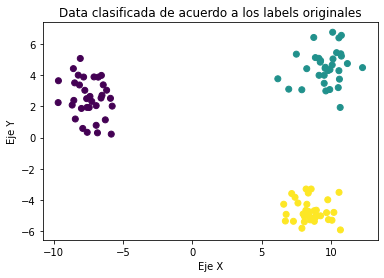

In [ ]:
#Se printean los datos de acuerdo a los labels para identificar y tener un vistazo de la data

plt.figure()
plt.scatter(data.T[0], data.T[1], c=labels)
plt.title("Data clasificada de acuerdo a los labels originales")
plt.ylabel("Eje Y")
plt.xlabel("Eje X")
plt.show()

# Parte 1.2
 
En esta parte se decidió realizar K-means usando una librería de C++ en Python (mlpack)

In [ ]:
!pip install mlpack3 #Se instala mlpack

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import mlpack  #Se importa mlpack
d = mlpack.kmeans(clusters=k, input=data, max_iterations=300)
centroid = d['centroid']
output = d['output'] 

In [ ]:
#%timeit -r100 mlpack.kmeans(clusters=k, input=data, max_iterations=300) #Se corre 100 veces y se saca el tiempo promedio y el error

# Parte 2

K-means en Python sin librerías

In [ ]:
#Basado en el código publicado en la página stanford.edu escrita por Chris Piech acerca de KMeans

import numpy as np
import random

#### Se crea la función k_means 
# k_means: recibe la data (un np.array), el número de clusters y el máximo de iteraciones, 
# entrega los centroides de los datos clasificados.

def k_means(data, n, max_iter): 
  centroids=random.choices(data, k=n)           #Primeros centroides se eligen aleatorios
  iters=0 
  while iters <= max_iter:                      #condición de término 1: que las iteraciones lleguen al máximo (300)
    oldCentroids = centroids                    #Se actualizan los antiguos centroides
    iters+=1                                    #Se agrega uno al número de iteraciones hechas
    labels = getlabels(data, centroids)         #Se actualizan los labels
    centroids = getCentroids(data, labels, n)   #Se actualizan los centroides
    if np.array_equal(oldCentroids, centroids): #condición de término 2: que los centroides dejen de cambiar
      break
  
  return centroids

#### Se crea la función getlabels
# getlabels: recibe la data (un np.array) y los centroides (de la iteración correspondiente, 
# si se usa fuera de k_means, entrega los labels con los centroides que se le den), 
# entrega un np.array con los labels de cada dato en orden (los labels son 0, 1 o 2 en este caso).

def getlabels(datos, cents): 
  labels=np.zeros(datos.shape[0])

  for j in range(len(datos)):                  #Se hace un for para ir uno por uno en los datos
    min=np.inf                  
    for i in range(len(cents)):                #Se hace otro for por los centroides, donde se busca la menor distancia entre los centroides y el dato actual 
      diff = datos[j]-cents[i]
      dist=np.linalg.norm(diff)                #Se calcula la distancia entre el punto y el centroide actual
      if min>=dist:                            #si la distancia es menor que la registrada como mínima, 
        labels[j]=i                            #se asigna el índice del centroide al label del dato (que como son 3, el índice es 0, 1 o 2)
        min=dist                               #se cambia el mínimo para comparar con la distancia del siguiente centroide
  
  return labels

#### Se crea la función getCentroids
# getCentroids: recibe la data (un np.array), los labels actuales y el número de clusters, 
# entrega un np.array con los centroides actualizados.

#Para esta función se calcula directamente en la fórmula para cada centroide: 
#####   centroide_i=(suma de datos que tienen el label i)/(cantidad de datos con label i)

def getCentroids(datos, labels, n):
  centroids=np.zeros((n,2))
  for i in range(n):
    
    sum0=np.array([0,0], dtype='float64')
    sum1=0
    for j in range(len(labels)):
      if labels[j]==i:
        sum0 += datos[j]
        sum1 += 1
    centroids[i]=sum0 / sum1

  return centroids


In [ ]:
#%timeit -r100 k_means(data,3,300)

# Parte 3

K-means en Python CON librerías

In [ ]:
#Se utiliza la función kmeans incorporada en la librería de scikitlearn

kMeans = sklearn.cluster.KMeans(k, max_iter=300)
kMeans.fit(data)
means = kMeans.cluster_centers_

#print(means)

In [ ]:
#%timeit -r100 kMeans.cluster_centers_

# Comparación de datos y tiempos

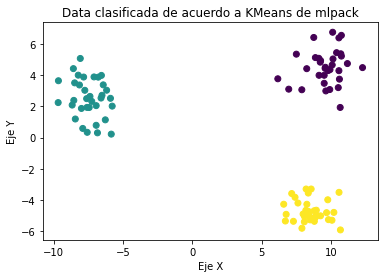

In [ ]:
#CON MLPACK
#Se probó si los resultados graficados daban iguales o parecidos a con los labels originales usando kmeans de mlpack

pred_labels=getlabels(data, centroid)
plt.figure()
plt.scatter(data.T[0], data.T[1], c=pred_labels)
plt.title("Data clasificada de acuerdo a KMeans de mlpack")
plt.ylabel("Eje Y")
plt.xlabel("Eje X")
plt.show()

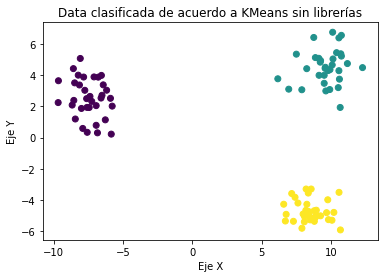

In [ ]:
#PYTHON SIN LIBRERÍAS
#Se probó si los resultados graficados daban iguales o parecidos a con los labels originales usando kmeans sin librerías

python_cent = k_means(data, 3, 300)
python_labels=getlabels(data, python_cent)
plt.figure()
plt.scatter(data.T[0], data.T[1], c=python_labels)
plt.title("Data clasificada de acuerdo a KMeans sin librerías")
plt.ylabel("Eje Y")
plt.xlabel("Eje X")
plt.show()

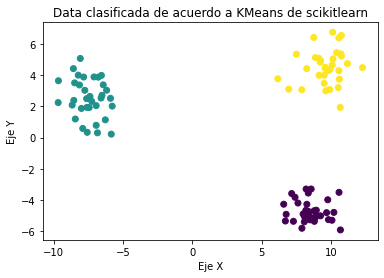

In [ ]:
#PYTHON CON LIBRERÍAS
#Se probó si los resultados graficados daban iguales o parecidos a con los labels originales usando kmeans de scikitlearn

pythonsin_labels=getlabels(data, means)
plt.figure()
plt.scatter(data.T[0], data.T[1], c=pythonsin_labels)
plt.title("Data clasificada de acuerdo a KMeans de scikitlearn")
plt.ylabel("Eje Y")
plt.xlabel("Eje X")
plt.show()

In [ ]:
from timeit import timeit as timeit

veces=100
tiempos1=np.zeros(veces)
tiempos2=np.zeros(veces)
tiempos3=np.zeros(veces)

s0='''
import mlpack
import sklearn.datasets
import sklearn.cluster
import scipy.cluster.vq
n = 100
k = 3
data, labels = sklearn.datasets.make_blobs(
    n_samples=n, n_features=2, centers=k)
'''

s1 = ''' 
from __main__ import k_means
import numpy as np 
import random
import sklearn.datasets
import sklearn.cluster
import scipy.cluster.vq
n = 100
k = 3
data, labels = sklearn.datasets.make_blobs(
    n_samples=n, n_features=2, centers=k)
'''

s2='''
import sklearn.datasets
import sklearn.cluster
import scipy.cluster.vq
n = 100
k = 3
data, labels = sklearn.datasets.make_blobs(
    n_samples=n, n_features=2, centers=k)
'''

for vez in range(veces):
  tiempos1[vez]=timeit("mlpack.kmeans(clusters=3, input=data, max_iterations=300)", number=1, setup=s0)
  tiempos2[vez]=timeit("k_means(data, 3, 300)",number=1, setup=s)
  tiempos3[vez]=timeit("kMeans.cluster_centers_",number=1, setup=s1)

print(tiempos1)


IndentationError: ignored